In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import japanize_matplotlib

In [2]:
img = cv2.imread('./chapter-5/data/sample.jpg')
img

array([[[ 8, 10,  4],
        [ 8, 10,  4],
        [ 8, 10,  4],
        ...,
        [47, 69, 45],
        [46, 66, 47],
        [45, 65, 46]],

       [[ 8, 10,  4],
        [ 8, 10,  4],
        [ 8, 10,  4],
        ...,
        [50, 72, 48],
        [49, 70, 48],
        [48, 69, 47]],

       [[ 9, 12,  3],
        [ 9, 12,  3],
        [ 9, 12,  3],
        ...,
        [52, 74, 49],
        [50, 72, 48],
        [48, 70, 46]],

       ...,

       [[20, 48,  5],
        [17, 47,  4],
        [15, 46,  1],
        ...,
        [27, 32, 31],
        [21, 21, 27],
        [15, 14, 23]],

       [[18, 49,  4],
        [17, 48,  3],
        [15, 47,  0],
        ...,
        [27, 31, 25],
        [20, 22, 22],
        [17, 16, 18]],

       [[18, 50,  3],
        [16, 48,  1],
        [12, 46,  0],
        ...,
        [26, 32, 21],
        [21, 22, 18],
        [17, 17, 17]]], dtype=uint8)

In [3]:
cv2.imshow("img_test", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
img.shape

(3456, 5184, 3)

In [5]:
print(img[0])
print(img[0].shape)#0番目の情報はBGR,高さデータ

[[ 8 10  4]
 [ 8 10  4]
 [ 8 10  4]
 ...
 [47 69 45]
 [46 66 47]
 [45 65 46]]
(5184, 3)


In [6]:
print(img[:,0])
print(img[:0].shape)#高さx色情報になっている,横幅データ

[[ 8 10  4]
 [ 8 10  4]
 [ 9 12  3]
 ...
 [20 48  5]
 [18 49  4]
 [18 50  3]]
(0, 5184, 3)


In [7]:
print(img[:,:,0])
print(img[:,:,0].shape)#0番目の色データの取得

[[ 8  8  8 ... 47 46 45]
 [ 8  8  8 ... 50 49 48]
 [ 9  9  9 ... 52 50 48]
 ...
 [20 17 15 ... 27 21 15]
 [18 17 15 ... 27 20 17]
 [18 16 12 ... 26 21 17]]
(3456, 5184)


In [8]:
#画像の切り出し
img_extract = img[700:1200,300:800,:]
cv2.imshow("img_test",img_extract)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
cv2.imshow("img_test",img_extract[:,:,0])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
cv2.imshow("img_test",img_extract[:,:,2])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#カラーヒストグラムの可視化
hist_b = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
print(hist_b.shape)
hist_b[:5]

(256, 1)


array([[316922.],
       [163325.],
       [130665.],
       [ 97818.],
       [ 81594.]], dtype=float32)

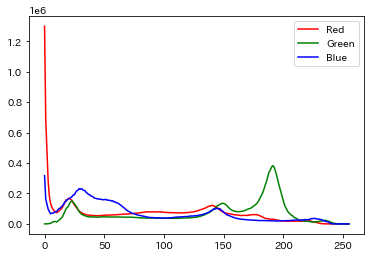

In [12]:
hist_g = cv2.calcHist([img],channels=[1],mask=None,histSize=[256],ranges=[0,256])
hist_r = cv2.calcHist([img],channels=[2],mask=None,histSize=[256],ranges=[0,256])

plt.plot(hist_r, color='r', label="Red")
plt.plot(hist_g, color='g', label="Green")
plt.plot(hist_b, color='b', label="Blue")
plt.legend()
plt.show()

In [13]:
#BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb.shape

(3456, 5184, 3)

In [14]:
cv2.imshow("img_test", img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

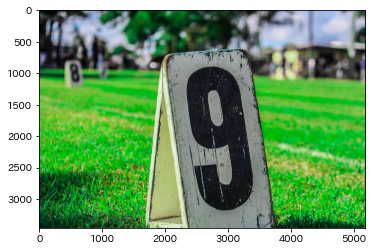

In [15]:
plt.imshow(img_rgb)

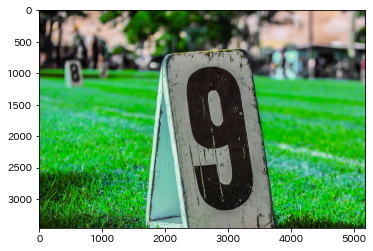

In [16]:
plt.imshow(img)

In [17]:
#画像サイズの変更
height, width, channels = img.shape
print(width, height)#形状の確認

5184 3456


(300, 500, 3)


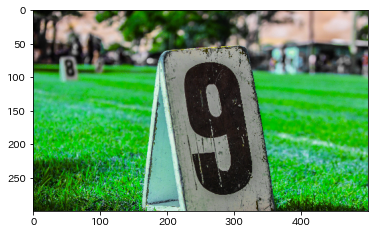

In [18]:
img_resized = cv2.resize(img, (500, 300))
print(img_resized.shape)
plt.imshow(img_resized)#Good

(500, 300, 3)


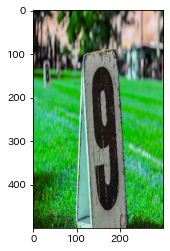

In [19]:
img_resized = cv2.resize(img, (300, 500))
print(img_resized.shape)
plt.imshow(img_resized)#BAD

(346, 518, 3)


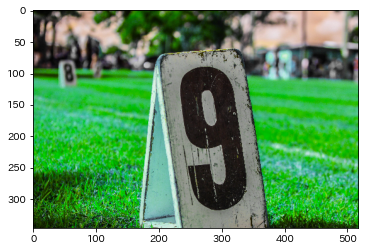

In [20]:
#割合指定.縮小
img_resized = cv2.resize(img, None, fx=0.1, fy=0.1)
print(img_resized.shape)
plt.imshow(img_resized)

(519, 777, 3)


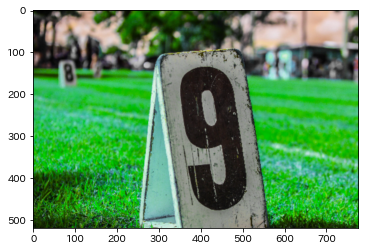

In [21]:
#割合指定.拡大
img_resized_2 = cv2.resize(img_resized, None, fx=1.5, fy=1.5)
print(img_resized_2.shape)
plt.imshow(img_resized_2)

(519, 777, 3)


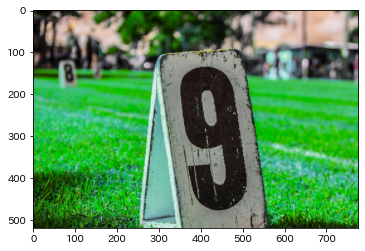

In [22]:
#リバイニア補完法(劣化が少ない補完)
img_resized_2 = cv2.resize(img_resized, None, fx=1.5, fy=1.5,interpolation=cv2.INTER_NEAREST)
print(img_resized_2.shape)
plt.imshow(img_resized_2)

(518, 346, 3)


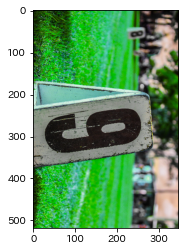

In [23]:
#画像の回転
img_rotated = cv2.rotate(img_resized, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_rotated)
print(img_rotated.shape)

(346, 518, 3)


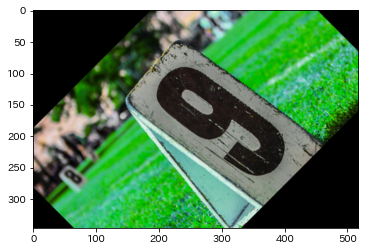

In [24]:
#π/4
height, width = img_resized.shape[:2]
center = (int(width/2), int(height/2))

rot = cv2.getRotationMatrix2D(center, 45, 1)
img_rotated = cv2.warpAffine(img_resized, rot, (width, height))
plt.imshow(img_rotated)
print(img_rotated.shape)

(346, 518, 3)


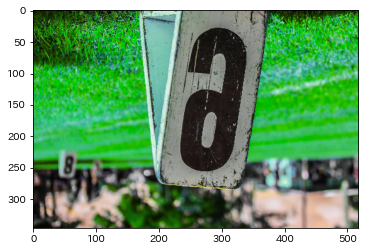

In [25]:
#反転
img_reverse = cv2.flip(img_resized, 0)
plt.imshow(img_reverse)
print(img_reverse.shape)

(346, 518, 3)


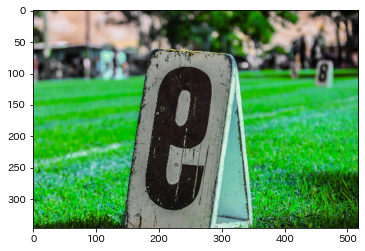

In [26]:
#反転
img_reverse = cv2.flip(img_resized, 1)
plt.imshow(img_reverse)
print(img_reverse.shape)

(346, 518, 3)


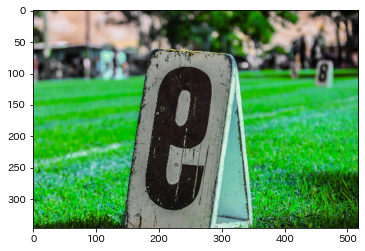

In [27]:
#numpyの順序逆転
img_reverse = img_resized[:, ::-1, :]
plt.imshow(img_reverse)
print(img_reverse.shape)

(346, 518)


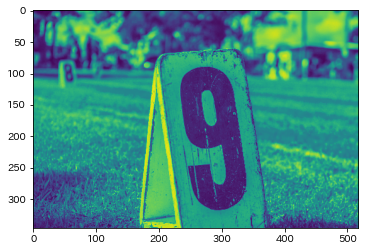

In [28]:
#グレイスケール変換
img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
print(img_gray.shape)

(346, 518)
60.0


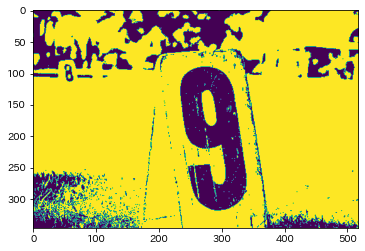

In [29]:
#二値化
th, img_th = cv2.threshold(img_gray, 60, 255, cv2.THRESH_BINARY)
plt.imshow(img_th)
print(img_th.shape)
print(th)

(346, 518, 3)


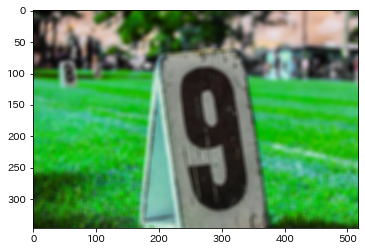

In [30]:
#平滑化(ぼかし)
img_smoothed = cv2.blur(img_resized, (8, 8))
plt.imshow(img_smoothed)
print(img_smoothed.shape)

(346, 518, 3)


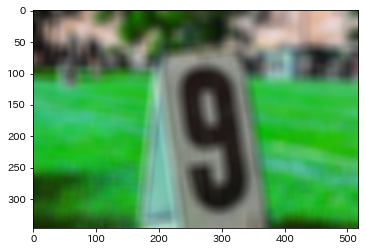

In [31]:
#20x20
img_smoothed = cv2.blur(img_resized, (20, 20))
plt.imshow(img_smoothed)
print(img_smoothed.shape)

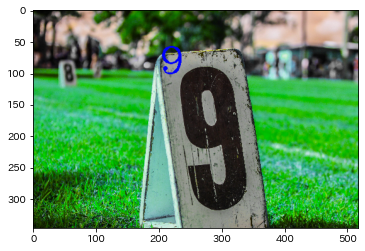

In [32]:
#テキスト描画
text = '9'
xy = (200, 100)
font = cv2.FONT_HERSHEY_COMPLEX
font_scale = 2
color = (0, 0, 255)
thickness = 2

img_text = cv2.putText(img_resized.copy(), text, xy, font, font_scale, color, thickness)
plt.imshow(img_text)

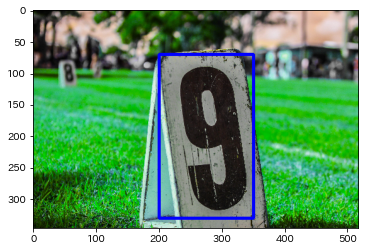

In [34]:
#四角形描画
x0, y0 = 200, 70
x1, y1 = 350, 330
color = (0, 0, 255)
thickness = 3

img_rect = cv2.rectangle(img_resized.copy(), (x0, y0), (x1, y1),color, thickness)
plt.imshow(img_rect)

In [36]:
#画像の保存
cv2.imwrite('output/sample_resized.jpg', img_resized)

True

(346, 518, 3)


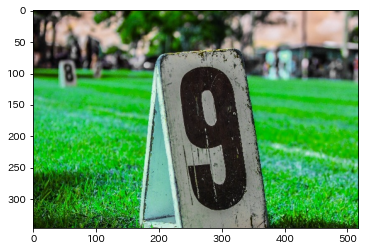

In [37]:
img_read = cv2.imread('./output/sample_resized.jpg')
plt.imshow(img_read)
print(img_read.shape)

(346, 518, 3)


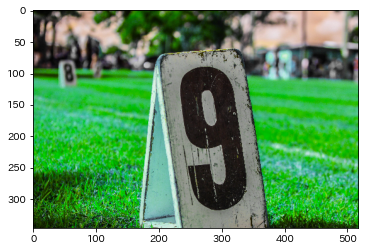

In [38]:
cv2.imwrite('output/sample_resized.png', img_resized)
img_read = cv2.imread('./output/sample_resized.png')
plt.imshow(img_read)
print(img_read.shape)